# 912. Sort an Array
https://leetcode.com/problems/sort-an-array/description/?envType=daily-question&envId=2024-07-25

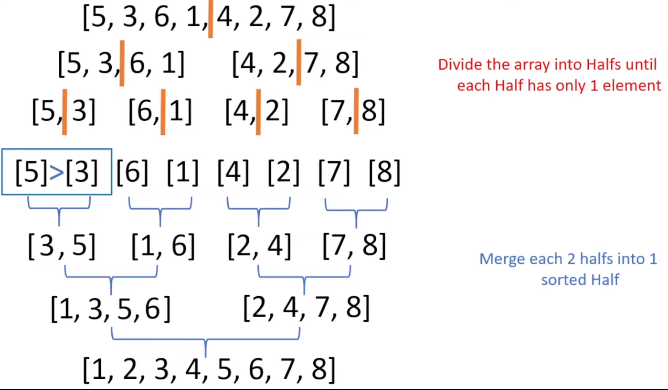

In [16]:
from typing import List

In [84]:
# merge sort
def sortArray(nums: List[int]) -> List[int]:
    if len(nums) <= 1:
        return nums
    
    def merge(left, right): # 排序合併
        merged = []
        left_pointer = 0
        right_pointer = 0
        while left_pointer < len(left) and right_pointer < len(right): #left,right 兩陣列排序
            if left[left_pointer] < right[right_pointer]:
                merged.append(left[left_pointer]) 
                left_pointer+=1
            else:
                merged.append(right[right_pointer])
                right_pointer+=1
        #print(left_pointer,right_pointer,merged,left,right)
        merged.extend(left[left_pointer:])  # 取出後來出現的值(避免重複+)
        merged.extend(right[right_pointer:]) # 超出範圍為[]
        #print(merged)
        return merged
    
    def merged_sort_recursive(arr): # 切成最小單位 分左右邊
        if len(arr) <= 1:
            return arr
        mid = len(arr) // 2
        left = merged_sort_recursive(arr[:mid])
        right = merged_sort_recursive(arr[mid:])
        #print(left,right)
        return merge(left,right) # 排序合併
    return merged_sort_recursive(nums)

In [85]:
nums = [5,2,3,1]
#Output: [1,2,3,5]

sortArray(nums)

0 1 [2] [5] [2]
0 1 [1] [3] [1]
1 2 [1, 2, 3] [2, 5] [1, 3]


[1, 2, 3, 5]

In [69]:
nums = [5,1,1,2,0,0]
#Output: [0,0,1,1,2,5]
sortArray(nums)

[0, 0, 1, 1, 2, 5]

## 步驟示例
初始數組: [5, 2, 3, 1]

* 分割: [5, 2] 和 [3, 1]
對 [5, 2] 和 [3, 1] 繼續分割:

* 分割: [5] 和 [2]
* 分割: [3] 和 [1]

開始合併:

* 合併 [5] 和 [2] 為 [2, 5]
* 合併 [3] 和 [1] 為 [1, 3]
* 最後合併 [2, 5] 和 [1, 3]:

合併後為 [1, 2, 3, 5]

In [95]:
# GPT:Quick Sort
def sortArray(nums: List[int]) -> List[int]:
    def partition(low,high):
        pivot = nums[high]
        i = low -1 
        for j in range(low,high):
            if nums[j] < pivot:
                i += 1
                nums[i], nums[j] = nums[j],nums[i]
                
        nums[i+1],nums[high] = nums[high],nums[i+1]
        print(nums,low,high,pivot)
        return i + 1
    def quick_sort_recursive(low,high):
        if low < high:
            pi = partition(low,high)
            quick_sort_recursive(low,pi-1)
            quick_sort_recursive(pi+1,high)
    quick_sort_recursive(0,len(nums)-1)
    return nums
nums = [5,3,2,1]
#Output: [1,2,3,5]
sortArray(nums)   

[1, 3, 2, 5] 0 3 1
[1, 3, 2, 5] 1 3 5
[1, 2, 3, 5] 1 2 2


[1, 2, 3, 5]

### 解釋
* partition 函數：這個函數選擇數組中的最後一個元素作為樞軸（pivot），並將所有小於樞軸的元素移動到樞軸的左側，所有大於樞軸的元素移動到樞軸的右側。最後，樞軸位於其正確的排序位置。
* quick_sort_recursive 函數：這是實現快速排序的遞歸函數。它通過 partition 函數將數組劃分為兩部分，然後遞歸地對兩部分分別進行排序。
* quick_sort 函數：這是對外的接口函數，它初始化遞歸的上下界並調用 quick_sort_recursive 函數來排序數組。

這個實現確保了我們在 O(n log n) 的時間複雜度內完成排序，同時由於在原數組上進行排序，空間複雜度也保持在最小。

## 步驟示例
* 初始數組: [5, 2, 3, 1]

* 樞紐選擇 1
分區後: [ ] 1 [5, 2, 3]
對 [5, 2, 3] 進行遞歸排序:

* 樞紐選擇 3
分區後: [2] 3 [5]
對 [2] 和 [5] 進行遞歸排序:

* [2] 已排序
[5] 已排序
合併結果: [1, 2, 3, 5]
